In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [2]:
plt.rcParams['figure.figsize'] = [8, 16]
plt.rcParams['figure.dpi'] = 200
# COLOR = 'white'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR
# plt.style.use('dark_background')

In [3]:
holds = []

for i in range( 1, 150 ):
    try:
        hold = Image.open( 'holds/h' + str( i ) + '.png' )
        hold.load()
        holds.append( {
            'hold': hold,
            'i': i
        } )
    except:
        continue

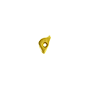

In [4]:
holds[0]['hold']

In [5]:
holds[0]['hold'].__array__()

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [6]:
print( holds[0]['hold'].__array__().shape )

(90, 90, 4)


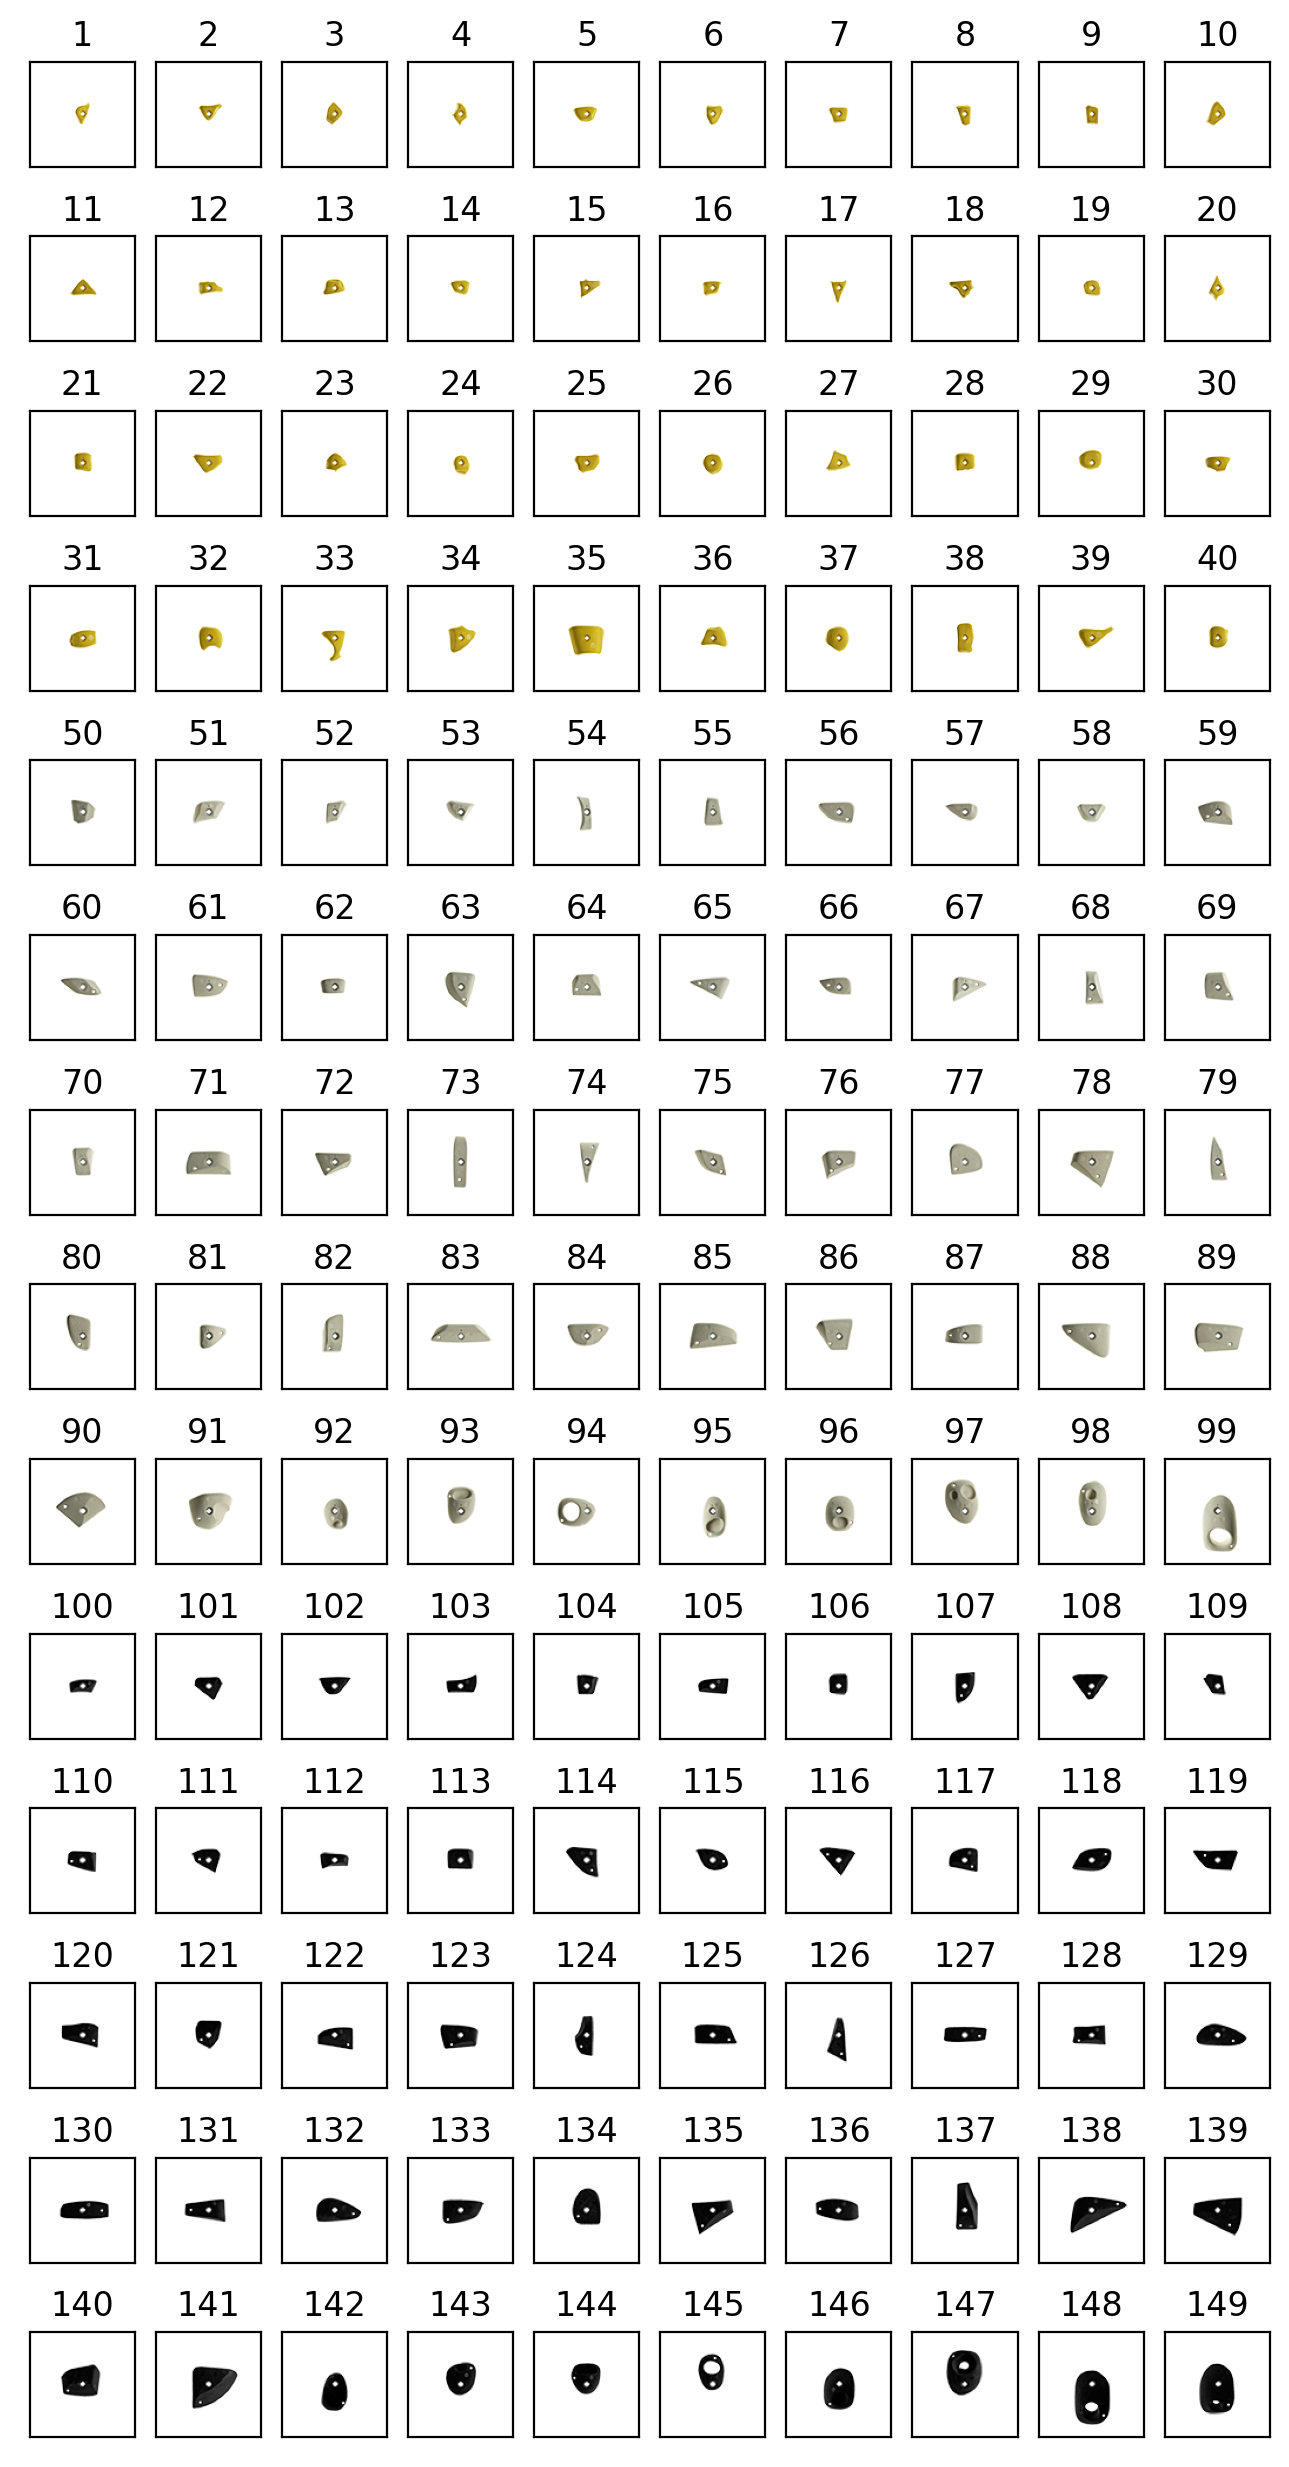

In [7]:
ncols = 10
nrows = 14

fig, ax = plt.subplots( nrows = nrows, ncols = ncols )

for i, row in enumerate( ax ):
    for j, col in enumerate( row ):
        ax[i,j].set_title( holds[i*ncols + j]['i'] )
        ax[i,j].imshow( holds[i*ncols + j]['hold'] )
        ax[i,j].set_xticks( [] )
        ax[i,j].set_yticks( [] )
plt.show()

In [9]:
import json

In [10]:
f = open( '2016holdset.txt' )
data = json.loads( f.read() )

In [11]:
locations = []

for holdset in data:
    for location in holdset['Holds']:
        locations.append( location['Location'] )

In [12]:
print( locations[0] )

{'Id': 0, 'Holdset': None, 'Description': 'H7', 'X': 445, 'Y': 636, 'Color': None, 'Rotation': 135, 'Type': 0, 'HoldNumber': '1', 'Direction': 2, 'DirectionString': 'SE'}


In [13]:
for location in locations:
    i = int( location['HoldNumber'] )
    
    for hold in holds:
        if hold['i'] == i:
            # print( 'Rotating hold', i, 'by', location['Rotation'] )
            hold['hold'] = hold['hold'].rotate( 360 - location['Rotation'] )

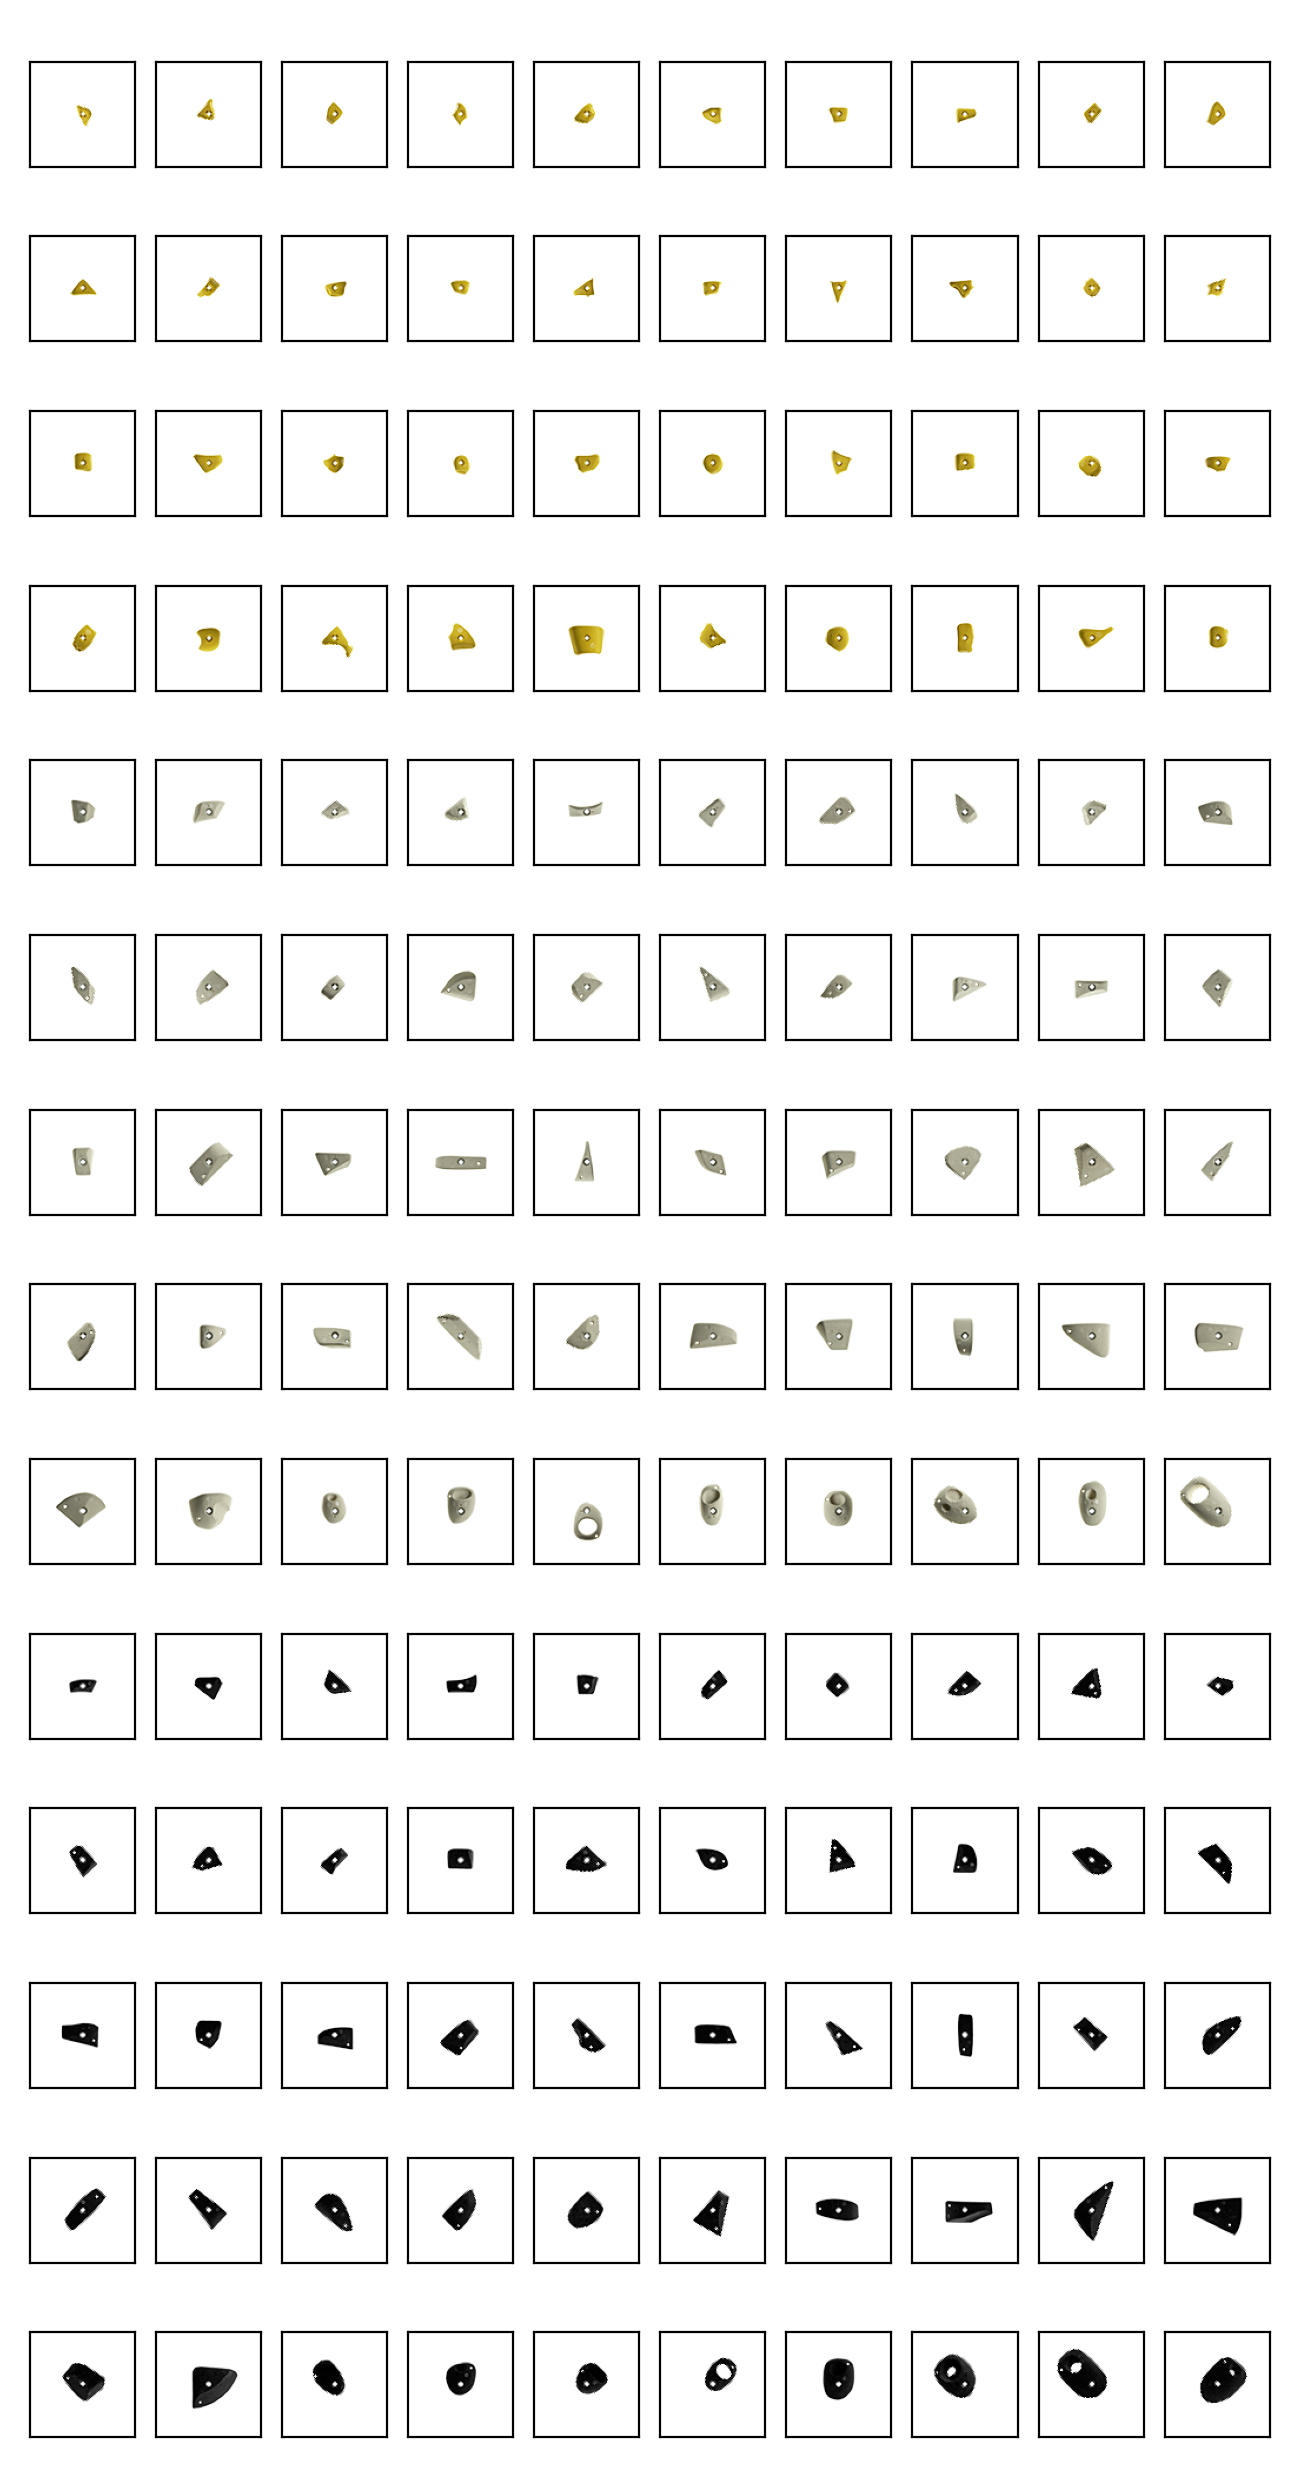

In [14]:
ncols = 10
nrows = 14

fig, ax = plt.subplots( nrows = nrows, ncols = ncols )

for i, row in enumerate( ax ):
    for j, col in enumerate( row ):
        ax[i,j].set_title( holds[i*ncols + j]['i'] )
        ax[i,j].imshow( holds[i*ncols + j]['hold'] )
        ax[i,j].set_xticks( [] )
        ax[i,j].set_yticks( [] )
plt.show()

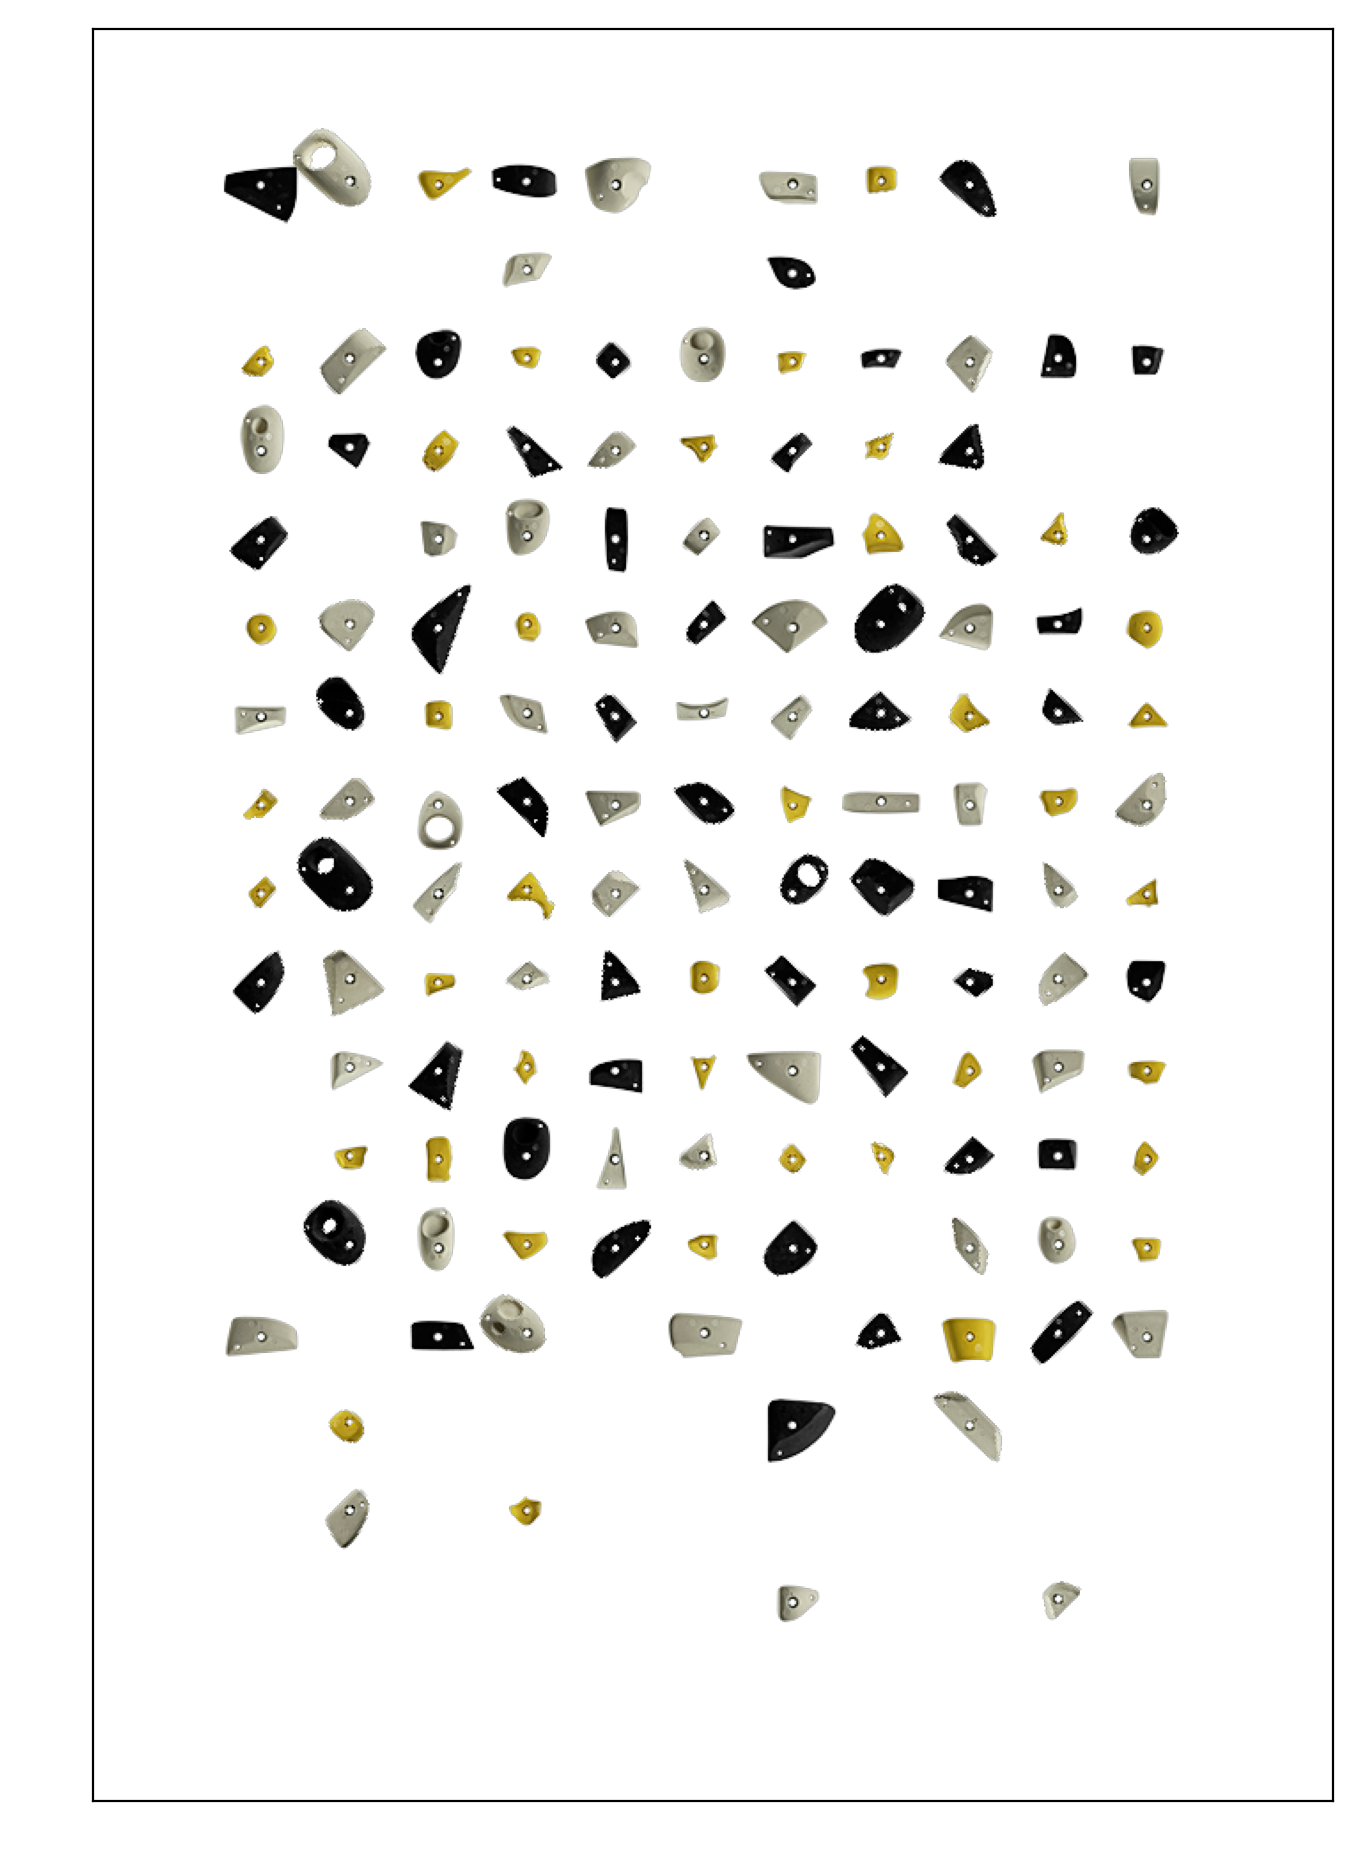

In [20]:
# Plot all the holds on the board in the correct position

img = Image.new( mode = "RGBA", size = ( 700, 1000 ) )

for location in locations:
    i = int( location['HoldNumber'] )
    
    for hold in holds:
        if hold['i'] == i:
            top_left = ( int( location['X'] - hold['hold']._size[0] / 2 ), int( location['Y'] - hold['hold']._size[1] / 2 ) )
            img.paste( hold['hold'], top_left, hold['hold'] )
            break
plt.imshow( img )

In [ ]:
import subprocess

In [ ]:
for i in range( 150 ):
    subprocess.Popen(
        'wget "https://www.moonboard.com/content/images/holds/h' + str( i ) + '.png"',
        shell = True
    )